In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

# requirements

In [2]:
!pip install mpl_finance

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs_indicator import *
from funcs_for_trade import *

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import pickle

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### Load data

In [ ]:
os.chdir(current_path)


interval = '30m'
date_path = './candlestick_concated/%s/2021-04-27/' % interval
date_path = './candlestick_concated/%s/2021-05-17/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-05-17 BTCUSDT.xlsx', '2021-05-17 ETHUSDT.xlsx', '2021-05-17 BCHUSDT.xlsx', '2021-05-17 XRPUSDT.xlsx', '2021-05-17 EOSUSDT.xlsx', '2021-05-17 LTCUSDT.xlsx', '2021-05-17 ETCUSDT.xlsx', '2021-05-17 LINKUSDT.xlsx', '2021-05-17 XLMUSDT.xlsx', '2021-05-17 ADAUSDT.xlsx', '2021-05-17 XMRUSDT.xlsx', '2021-05-17 SXPUSDT.xlsx', '2021-05-17 KAVAUSDT.xlsx', '2021-05-17 BANDUSDT.xlsx', '2021-05-17 DASHUSDT.xlsx', '2021-05-17 ZECUSDT.xlsx', '2021-05-17 XTZUSDT.xlsx', '2021-05-17 BNBUSDT.xlsx', '2021-05-17 ATOMUSDT.xlsx', '2021-05-17 ONTUSDT.xlsx', '2021-05-17 IOTAUSDT.xlsx', '2021-05-17 BATUSDT.xlsx', '2021-05-17 NEOUSDT.xlsx', '2021-05-17 QTUMUSDT.xlsx', '2021-05-17 WAVESUSDT.xlsx', '2021-05-17 MKRUSDT.xlsx', '2021-05-17 SNXUSDT.xlsx', '2021-05-17 DOTUSDT.xlsx', '2021-05-17 THETAUSDT.xlsx', '2021-05-17 ALGOUSDT.xlsx', '2021-05-17 KNCUSDT.xlsx', '2021-05-17 ZRXUSDT.xlsx', '2021-05-17 COMPUSDT.xlsx', '2021-05-17 OMGUSDT.xlsx']


## load res_df_dict

In [3]:
save_path = './candlestick_concated/res_df/'
dict_name = "2021-06-30 ETHUSDT_sartrend_backi2_res_dfs.pkl"
dict_name = "2021-07-01 ETHUSDT_backi2_res_dfs.pkl"
dict_name = "2021-07-01 BTCUSDT_majorst_on30_backi2_res_dfs.pkl"


#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  res_df_dict = pickle.load(f)

print(dict_name, "loaded !")

2021-07-01 BTCUSDT_majorst_on30_backi2_res_dfs.pkl loaded !


## updown ml survey

### get pr data

start_stamp : 0
2021-07-01 BTCUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 BCHUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 XRPUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 EOSUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 LTCUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 ETCUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 LINKUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 XLMUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 ADAUSDT_majorst_on30_backi2.xlsx loaded !
2021-07-01 ETHUSDT_majorst_on30_backi2.xlsx loaded !
len(res_df) : 14448


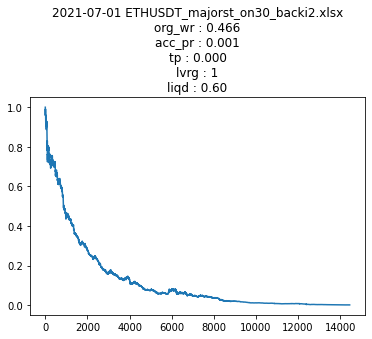

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break


prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.5, 1.05, 0.001)
tp_list = np.arange(0.25, 2.85, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
lvrg_list = range(6, 10)
lvrg_list = range(1, 2)
# lvrg_list = range(5, 6)


for key, res_df in res_df_dict.items():

  print(key, "loaded !")
  # print("res_df.columns :", res_df.columns)  
  # print(res_df.tail(100))
  # print("res_df.index[0] :", res_df.index[0])
  # print("intmin(res_df.index[0]) :", intmin(res_df.index[0]))
  # break

  if 'eth'.upper() in key:
    pass
  else:
    continue

  # for key in keys:  
    
  print('len(res_df) :', len(res_df))
  
  res_df['min_upper'] = np.min(res_df[["major_ST1_Up", "major_ST2_Up", "major_ST3_Up"]], axis=1)
  res_df['max_lower'] = np.max(res_df[["major_ST1_Down", "major_ST2_Down", "major_ST3_Down"]], axis=1)
  
  gap = res_df['min_upper'] - res_df['max_lower']

  #     find best lvrg with lq    #
  # for lvrg in lvrg_list:
    
  #       tp opt      #
  best_tp = None
  best_ap = 0
  best_pr = None

    # #        find best tp       #
    # for tp in tp_list:

    # --------- dynamic fishing by price line gap --------- #


  # long_ep = res_df['close'].shift(1) * (1 / (tp + 1))
  # long_ep = res_df['close'].shift(1) - gap * tp
  long_ep = res_df['close'].shift(1)

  #       long (base)      #
  pr = (res_df['close'] / long_ep - fee - 1) * lvrg + 1

  short_pr = (long_ep / res_df['close'] - fee - 1) * lvrg + 1

  #     set condition   #
  # pr = np.where(res_df['low'] < long_ep, pr, 1)

  lq = (res_df['low'] / long_ep - fee - 1) * lvrg + 1

  # plt.plot(np.cumprod(pr))
  # plt.show()
  # break

  #       short       #
  # s_pr = (-res_df['close'].pct_change() - fee) * lvrg + 1

  #       fill na with 1.0      #
  pr = np.where(np.isnan(pr), 1, pr)
  short_pr = np.where(np.isnan(short_pr), 1, short_pr)

  # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
  lq = np.where(np.isnan(lq), 1, lq)
  # s_pr = np.where(np.isnan(s_pr), 1, pr)

  #       set lq      #
  pr = np.where((pr != 1) & (lq <= 0), 0, pr)
  # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

  # plt.plot(np.cumprod(pr))
  # plt.title("%.3f" % tp)
  # plt.show()
  # plt.close()

  ap = np.cumprod(pr)[-1]
  if ap >= best_ap:
    best_ep = long_ep
    best_ap = ap
    # best_tp = tp
    best_pr = pr

  best_pr = np.array(best_pr)
  org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

  # plt.figure(figsize=(10, 4))
  plt.figure(figsize=(6, 4))
  # plt.subplot(121)
  plt.plot(np.cumprod(best_pr))
  plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s\nliqd : %.2f" % (key, org_wr, np.cumprod(best_pr)[-1], 0, lvrg, min(lq)))

  
  #     avoid dropping    #      
  # ema = res_df['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
  # # avoid_pr = np.where(res_df['close'].shift(1) > ema.shift(1), test_pr, 1)

  # avoid_pr = np.where(ema.shift(1) > ema.shift(2), best_pr, 1)

  # # ma = res_df['close'].rolling(120).mean()
  # # avoid_pr = np.where(ma.shift(1) > ma.shift(2), best_pr, 1)

  # avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

  
  # plt.subplot(122)
  # plt.plot(np.cumprod(avoid_pr))
  # plt.title("%s\navoid_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, avoid_wr, np.cumprod(avoid_pr)[-1], best_tp, lvrg))

  plt.show()








### dataset preparation

np.sum(np.isnan(temp_onprice_x.values)) > 0
np_data_x.shape : (2888, 10, 15)
np_data_y.shape : (2888,)
np_data_idx.shape : (2888,)


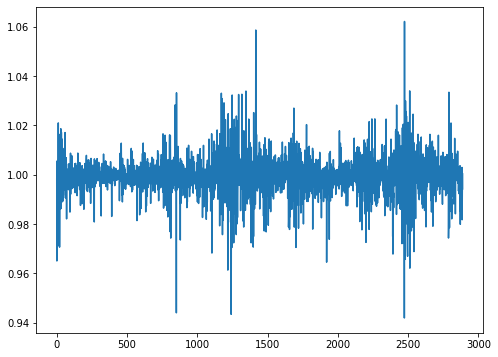

In [9]:
def min_max_scale(npy_x):
  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

np_target_pr = pr
np_target_pr_short = short_pr
  
assert len(pr) == len(res_df), "len(pr) != len(res_df)"

input_data_length = 10
shift_size = 5

data_x, data_y = [], []
data_y_short = []
data_idx = []


res_df['min_upper'] = np.min(res_df[["major_ST1_Up", "major_ST2_Up", "major_ST3_Up"]], axis=1)
res_df['max_lower'] = np.max(res_df[["major_ST1_Down", "major_ST2_Down", "major_ST3_Down"]], axis=1)

res_df['middle_line'] = (res_df['min_upper'] + res_df['max_lower']) / 2

res_df['upper_middle'] = (res_df['middle_line'] + res_df['min_upper']) / 2
res_df['lower_middle'] = (res_df['middle_line'] + res_df['max_lower']) / 2


#         select plot columns       #
basic_list = ['open', 'high', 'low', 'close', 'major_ST1_Up', 'major_ST1_Down',
       'major_ST2_Up', 'major_ST2_Down', 'major_ST3_Up', 'major_ST3_Down',
       'middle_line', 'min_upper', 'max_lower', 'upper_middle', 'lower_middle']

senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
# senkoua_list = ['senkou_a1',  'senkou_a2']
# senkoub_list = ['senkou_b1',  'senkou_b2']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4']

# sma_list = ['sma1', 'sma4']
sma_list = ['sma1']


#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
# trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

input_colname = basic_list + senkoua_list + senkoub_list + sar_list + sma_list + macd_list + stoch_list + fisher_list + cctbbo_list
# price_colname = basic_list + senkoua_list + senkoub_list + sar_list + sma_list
price_colname = basic_list

outer_price_colname = macd_list + stoch_list + fisher_list + cctbbo_list



#   이곳에서, local / global scaling 을 진행해 data 를 추출해야할 것임    #
# for s_pr_i, _i in enumerate(target_idx_list):
for s_pr_i in range(len(pr)):


  if s_pr_i < input_data_length:
    continue

  #     you should copy res_df for consistency    #
  temp_x = res_df.iloc[s_pr_i - input_data_length:s_pr_i].copy()
  # temp_x = res_df.iloc[s_pr_i - input_data_length:s_pr_i]
  temp_y = np_target_pr[s_pr_i]
  temp_y_short = np_target_pr_short[s_pr_i]

  #   1. temp_x 를 on_price / outer_price 로 나누어 scaling 진행   #
  #   2. 각각에 해당하는 column_name 가져오기     #
  temp_onprice_x = temp_x[price_colname]
  # print(temp_onprice_x)

  # temp_outerprice_x = temp_x[outer_price_colname]
  # print(temp_outerprice_x)

  if np.sum(np.isnan(temp_onprice_x.values)) > 0:
    print("np.sum(np.isnan(temp_onprice_x.values)) > 0")
    continue

  scaled_onprice_x = min_max_scale(temp_onprice_x.values)
  
  # plt.plot(scaled_onprice_x)
  # plt.show()

  #       Todo      #
  #       1. scaled pr      #
  #       1-1. check org y_max / y_min
  # # max_min_fluc = np.max(temp_onprice_x) / np.min(temp_onprice_x)
  # max_min_fluc = max(temp_onprice_x) / min(temp_onprice_x)
  max_min_fluc = np.max(np.max(temp_onprice_x)) / np.min(np.min(temp_onprice_x))
  # max_min_fluc = (temp_onprice_x.max()) / (temp_onprice_x.min())
  # print("max_min_fluc :", max_min_fluc)

  # scaled_y = (1 / max_min_fluc) * temp_y
  scaled_y = (1 / max_min_fluc) * (temp_y - 1) + 1
  scaled_y_short = (1 / max_min_fluc) * (temp_y_short - 1) + 1
  # scaled_y = temp_y
  
  # print("temp_y :", temp_y)
  # print("scaled_y :", scaled_y)
  # print()

  data_x.append(scaled_onprice_x)
  data_y.append(scaled_y)
  data_y_short.append(scaled_y_short)
  # data_y.append(temp_y)

  data_idx.append(s_pr_i)
  
  # break

np_data_x = np.array(data_x)[::shift_size]
np_data_y = np.array(data_y)[::shift_size]
np_data_y_short = np.array(data_y_short)[::shift_size]
np_data_idx = np.array(data_idx)[::shift_size]
print("np_data_x.shape :", np_data_x.shape)
print("np_data_y.shape :", np_data_y.shape)
print("np_data_idx.shape :", np_data_idx.shape)

# print(test_y)
plt.plot(np_data_y)
plt.show()

#### split data

In [11]:
tvt_size = len(np_data_x)

re_np_data_x = np.expand_dims(np_data_x, axis=-1)
print("re_np_data_x.shape :", re_np_data_x.shape)
# break

train_x = re_np_data_x[:int(tvt_size * 0.6)]
val_x = re_np_data_x[int(tvt_size * 0.6):int(tvt_size * 0.8)]
test_x = re_np_data_x[int(tvt_size * 0.8):]

print("len(train_x) :", len(train_x))
print("len(val_x) :", len(val_x))
print("len(test_x) :", len(test_x))

train_y = np_data_y[:int(tvt_size * 0.6)]
val_y = np_data_y[int(tvt_size * 0.6):int(tvt_size * 0.8)]
test_y = np_data_y[int(tvt_size * 0.8):]

train_y_short = np_data_y_short[:int(tvt_size * 0.6)]
val_y_short = np_data_y_short[int(tvt_size * 0.6):int(tvt_size * 0.8)]
test_y_short = np_data_y_short[int(tvt_size * 0.8):]

train_idx = np_data_idx[:int(tvt_size * 0.6)]
val_idx = np_data_idx[int(tvt_size * 0.6):int(tvt_size * 0.8)]
test_idx = np_data_idx[int(tvt_size * 0.8):]


# ----------- save set ----------- #

ckpt_path = current_path + 'ckpt/'

pair_name = key.split(".")[0].split(" ")[1]
print("pair_name :", pair_name)

# model_name = 'basicv2.0a_prscale_%s_%s.h5' % (pair_name, input_data_length)
model_name = 'updown_prlvrgscale_%s_%s_%s.h5' % (pair_name, input_data_length, shift_size)
# model_name = 'updown_prlvrgscale_%s_%s_%s_short.h5' % (pair_name, input_data_length, shift_size)
print("model_name :", model_name)

# break

re_np_data_x.shape : (2888, 10, 15, 1)
len(train_x) : 1732
len(val_x) : 578
len(test_x) : 578
pair_name : ETHUSDT_majorst_on30_backi2
model_name : updown_prlvrgscale_ETHUSDT_majorst_on30_backi2_10_5.h5


#### define model

In [14]:
# MAX_EPOCHS = 100
# MAX_EPOCHS = 1000
MAX_EPOCHS = 500

patience = MAX_EPOCHS // 5
patience = MAX_EPOCHS // 10
# patience = 2

ckpt_path = current_path + 'ckpt/'

def compile_and_fit(model, model_name, train_flow, val_flow, class_weight=None, patience=patience):

  tf.keras.backend.clear_session()

  checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path + model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='auto')

  # model.compile(loss='categorical_crossentropy', 
  #               optimizer=tf.optimizers.Adam(learning_rate=1e-5, decay=5e-6), 
  #               # optimizer=tf.optimizers.Adam(learning_rate=1e-6, decay=5e-7), 
  #               metrics=['accuracy'])
  
  # model.compile(loss='categorical_crossentropy', 
  # model.compile(loss=tf.losses.SparseCategoricalCrossentropy(), 
  #               optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
  #               metrics=[tf.metrics.Accuracy()])

  model.compile(loss=tf.losses.MeanSquaredError(),
                # optimizer=tf.optimizers.Adam(learning_rate=1e-4, decay=1e-5),
                optimizer=tf.optimizers.Adam(learning_rate=1e-5, decay=5e-6), 
                # optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
                metrics=[tf.metrics.MeanAbsoluteError()])
  

  history = model.fit(train_flow, epochs=MAX_EPOCHS,
                      validation_data=val_flow,
                      callbacks=[checkpoint, early_stopping],
                      # callbacks=[early_stopping],
                      # class_weight=class_weight
                      )
  return history

In [15]:
def cnn2d_model(input_shape):

    visible = tf.keras.layers.Input(shape=input_shape, name='input')
    
    net = tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', kernel_initializer='he_normal')(visible)
    # net = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal')(visible)
    # net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.BatchNormalization()(net)
    # net = tf.keras.layers.Activation('relu')(net)
    net = tf.keras.layers.LeakyReLU()(net)
    # net = tf.keras.layers.MaxPool2D(pool_size=2)(net)
    # net = tf.keras.layers.AveragePooling2D(padding='same')(net)


    # net = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    net = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.BatchNormalization()(net)
    # net = tf.keras.layers.Activation('relu')(net)
    net = tf.keras.layers.LeakyReLU()(net)
    # net = tf.keras.layers.MaxPool2D(pool_size=2)(net)

    net = tf.keras.layers.Flatten()(net)
    net = tf.keras.layers.Dense(128)(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Dense(64)(net)
    net = tf.keras.layers.LeakyReLU()(net)

    # net = tf.keras.layers.Dense(2, activation='softmax')(net)
    net = tf.keras.layers.Dense(1)(net)

    # create model 
    model = tf.keras.models.Model(inputs=visible, outputs=net)
    # summary layers
    # print(model.summary())
    
    return model

#### train

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator( 
    # rotation_range = 45,
    # zoom_range = 0.5,
    # shear_range = 0.5,
    # horizontal_flip = True,
    # vertical_flip = True,
    # width_shift_range=0.5,
    # height_shift_range=0.5,
    # fill_mode = 'nearest'
    )

valgen = ImageDataGenerator( 
    )

datagen.fit(train_x)
valgen.fit(val_x)
batch_size = 64

# train_flow = datagen.flow(train_x, train_y, batch_size=batch_size) 
# val_flow = valgen.flow(val_x, val_y, batch_size=batch_size) 

train_flow = datagen.flow(train_x, train_y_short, batch_size=batch_size) 
val_flow = valgen.flow(val_x, val_y_short, batch_size=batch_size) 

#         train / test      #
model = cnn2d_model(train_x.shape[1:])
history = compile_and_fit(model, model_name, train_flow, val_flow)

Epoch 1/500
28/28 [==============================] - 17s 38ms/step - loss: 0.1085 - mean_absolute_error: 0.2556 - val_loss: 0.0309 - val_mean_absolute_error: 0.1508

Epoch 00001: val_loss improved from inf to 0.03095, saving model to /content/drive/My Drive/Colab Notebooks/JnQ/ckpt/updown_prlvrgscale_ETHUSDT_majorst_on30_backi2_10_5.h5
Epoch 2/500
28/28 [==============================] - 1s 22ms/step - loss: 0.0141 - mean_absolute_error: 0.0926 - val_loss: 0.0091 - val_mean_absolute_error: 0.0756

Epoch 00002: val_loss improved from 0.03095 to 0.00914, saving model to /content/drive/My Drive/Colab Notebooks/JnQ/ckpt/updown_prlvrgscale_ETHUSDT_majorst_on30_backi2_10_5.h5
Epoch 3/500
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - mean_absolute_error: 0.0728 - val_loss: 0.0067 - val_mean_absolute_error: 0.0653

Epoch 00003: val_loss improved from 0.00914 to 0.00675, saving model to /content/drive/My Drive/Colab Notebooks/JnQ/ckpt/updown_prlvrgscale_ETHUSDT_majorst_

#### test

test_result.shape : (578, 1)
target_y.shape : (578,)
y_score.shape : (578, 1)
acc_pr_bythr : [0.8581899466778163, 0.8648463099464514, 0.8648463099464514, 0.8513472244287915, 0.8556982303056501, 0.8556982303056501, 0.8512934508272102, 0.8592176362204449, 0.8308941509990403, 0.8308941509990403, 0.8223581289598751, 0.8165605797535098, 0.8194162918533402, 0.8167194489994065, 0.8167194489994065, 0.8114187413153179, 0.8143555166709462, 0.8143555166709462, 0.8143555166709462, 0.8230964930786775, 0.8220935456185283, 0.8286726256064925, 0.8243754193899878, 0.8235570723767731, 0.8235570723767731, 0.7641207978953035, 0.7468711037055525, 0.7483189710350935, 0.7483189710350935, 0.745266977917364, 0.7372678459970379, 0.736048106887822, 0.7365659083214435, 0.7365659083214435, 0.747362436057996, 0.7449265561725751, 0.7436663549041636, 0.7454173308610822, 0.7457478075938997, 0.725311649960086, 0.7287867738178876, 0.7411367671963678, 0.7411367671963678, 0.7400779228424913, 0.7582518817448575, 0.74582233

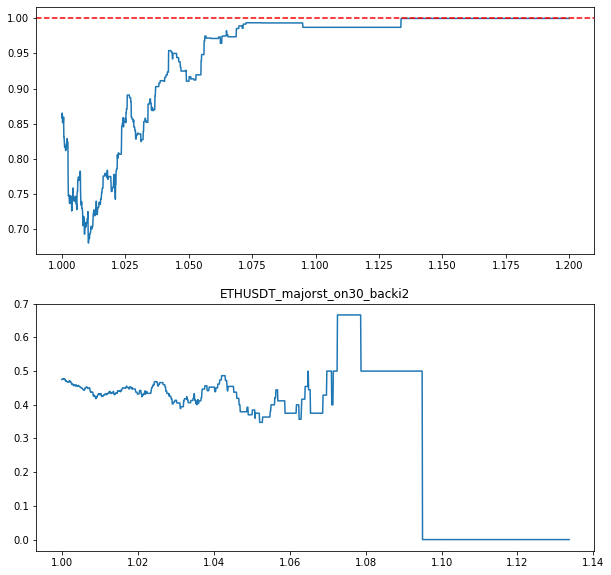

In [17]:
# model_name = 'basicv2.0a_prscale_%s_%s.h5' % (pair_name, input_data_length)
# model_name = 'basicv2.0a_prlvrgscale_%s_%s.h5' % (pair_name, input_data_length)
# model_name = 'basicv2.0a_prlvrgscale_%s_%s_%s.h5' % (target_position_side, pair_name, input_data_length)

model_name = 'updown_prlvrgscale_%s_%s_%s.h5' % (pair_name, input_data_length, shift_size)

short = False
if short:
  model_name = 'updown_prlvrgscale_%s_%s_%s_short.h5' % (pair_name, input_data_length, shift_size)

model = tf.keras.models.load_model(ckpt_path + model_name)

# target_x = np.vstack((train_x, val_x, test_x))
# print(train_y.shape)
# print(val_y.shape)
# print(test_y.shape)
# target_y = np.vstack((train_y.reshape(-1, 1), val_y.reshape(-1, 1), test_y.reshape(-1, 1)))


target_x = test_x
target_y = test_y

if short:
  target_y = test_y_short

test_result = model.predict(target_x)
print('test_result.shape :', test_result.shape)
# print('pr_val.shape :', pr_val.shape)

y_score = test_result[:, [-1]]
# y_score = test_result[:, [0]]
# print('target_y[:5] :', target_y.reshape(-1,)[:5])
# print('np.unique(target_y) :', np.unique(target_y, return_counts=True))
# print('y_score[:5] :', y_score[:5])
# print('np.unique(y_score) :', np.unique(y_score, return_counts=True))

print('target_y.shape :', target_y.shape)
print('y_score.shape :', y_score.shape)

# from sklearn.metrics import precision_recall_curve

#     precision recall curve   #
# precision, recall, threshold = precision_recall_curve(target_y, y_score)
# precision, recall = precision[:-1], recall[:-1]

# plt.plot(threshold, precision, label='precision')
# plt.plot(threshold, recall, label='recall')
# plt.legend()
# plt.title('precision recall')
# plt.show()
# print(y_pred)


# threshold = [0.65]
# print('threshold :', threshold)
# break

lvrg = 5
fee = 0.0006

acc_pr_bythr = []
wr_bythr = []
new_thresh = []

threshold = np.arange(1, 1.2, 0.0001)
# if short:
#   threshold = np.arange(1, 0.95, -0.0001)

for thresh in threshold:
  
  # if thresh < 0.5:
  #     continue

  # if short:
  #   y_pred = np.where(y_score[:, -1] < thresh, 1, 0)
  # else:
  y_pred = np.where(y_score[:, -1] > thresh, 1, 0)

  # print('y_pred.shape :', y_pred.shape)
  # print('y_pred :', y_pred)

  #     compare precision     #

  # print('precision :', precision_score(target_y, y_pred))
  # print('recall :', recall_score(target_y, y_pred))
  # print()

  # print('np.isnan(np.sum(x_test)) :', np.isnan(np.sum(x_test)))
  # print('np.isnan(np.sum(target_y)) :', np.isnan(np.sum(target_y)))

  # # plot_confusion_matrix(best_model, x_test, target_y, normalize=None)
  # # plt.show()  
  # print()

  # from sklearn.metrics import confusion_matrix

  # #     check win-ratio improvement     #
  # cmat = confusion_matrix(target_y, y_pred)
  # # print(cmat)
  # # print(np.sum(cmat, axis=1))
  

  # org_wr = np.sum(cmat, axis=1)[-1] / sum(np.sum(cmat, axis=1))
  # ml_wr = cmat[1][1] / np.sum(cmat, axis=0)[-1]
  # print('win ratio improvement %.2f --> %.2f' % (org_wr, ml_wr))

  test_size = len(target_y)
  test_pr_list = target_y

  # print('pr_test.shape :', pr_test.shape)

  # print(y_pred)
  # print(test_pr_list)

  pred_pr_list = np.where(y_pred == 1, test_pr_list.reshape(-1, ), 1)

  # print("pred_pr_list[:10] :", pred_pr_list[:10])


  #       lvrg adjustment    #
  # pred_pr_list = (pred_pr_list - 1) * lvrg + 1

  # pred_pr_list = np.where(np.isnan(pred_pr_list), 1.0, pred_pr_list)
  # pred_pr_list = np.where(pred_pr_list == 0.0, 1.0, pred_pr_list)
  # print('pred_pr_list.shape :', pred_pr_list.shape)

  # if np.cumprod(test_pr_list)[-1] < np.cumprod(pred_pr_list)[-1]:
  #   print('accum_pr increased ! : %.3f --> %.3f' % (np.cumprod(test_pr_list)[-1], np.cumprod(pred_pr_list)[-1]))
  #   print('thresh :', thresh)
    
  # if len(threshold) == 1:
#   plt.figure(figsize=(10, 5))
#   plt.subplot(121)
#   plt.plot(np.cumprod(test_pr_list))
#   plt.title('%.3f' % (np.cumprod(test_pr_list)[-1]))
# # plt.show()

#   plt.subplot(122)
#   plt.plot(np.cumprod(pred_pr_list))
#   plt.title('%.3f' % (np.cumprod(pred_pr_list)[-1]))
#   # plt.axvline(len(org_pr_test), linestyle='--', color='r')
#   plt.show()
  try:
    wr = len(pred_pr_list[pred_pr_list > 1]) / len(pred_pr_list[pred_pr_list != 1])
  except:
    # pass
    wr_bythr.append(np.nan)
  else:
    wr_bythr.append(wr)

  acc_pr_bythr.append(np.cumprod(pred_pr_list)[-1])
  new_thresh.append(thresh)


print('acc_pr_bythr :', acc_pr_bythr)

plt.figure(figsize=(10, 10))
# plt.subplot(121)
# plt.plot(threshold, precision, label='precision')
# plt.plot(threshold, recall, label='recall')
# plt.legend()
# plt.title('precision recall')
# plt.show()


plt.subplot(211)
plt.plot(new_thresh, acc_pr_bythr)
plt.axhline(1, linestyle='--', color='r')
# plt.axhline(np.cumprod(test_pr_list)[-1], linestyle='--', color='r')
try:
  plt.axhline(baseline_acc_pr, linestyle='--', color='b')
except Exception as e:
  print(e)

plt.subplot(212)
plt.plot(new_thresh[-len(wr_bythr):], wr_bythr)

plt.title(pair_name)
plt.show()


In [22]:
print(pred_pr_list)

[0.99880036 0.99880036 0.99880036 ... 0.99880036 0.99880036 0.99880036]
